In [34]:
import networkx as nx
import pandas as pd
from tqdm import tqdm
import numpy as np
import networkx as nx
from node2vec import Node2Vec
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import scipy
from random import sample
import csv
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import pickle 

In [2]:
def remove_zeros_distribution(x):

    return [i for i in x if i != 0]

def log_binning_distribution(x_i, B = 20): 
    
    x_i = remove_zeros_distribution(x_i)

    b_1 = min(x_i)
    b_Bp1 = max(x_i)
    q_1 = np.log(b_1)
    q_Bp1 = np.log(b_Bp1)
    D_q = q_Bp1 - q_1
    L_q = D_q / B

    q_list = []
    b_list = []

    for i in range(B):
        j = i + 1
        q_list.append(q_1 + (j-1)*L_q)
        b_list.append(np.exp(q_1 + (j-1)*L_q))
   
    binned_x_i = []
    density_list = []

    for i in range(len(b_list)-1):
        bin_low = b_list[i]
        bin_high = b_list[i+1]
        count_bin = 0
        for j in range(len(x_i)):
            if x_i[j] >= bin_low and x_i[j] < bin_high:
                count_bin = count_bin + 1
                
        if count_bin > 0:
            density_bin = count_bin / (len(x_i)*(bin_high-bin_low))
            density_list.append(density_bin)
            binned_x_i.append(bin_low)
        else:
            continue 
            
    return binned_x_i, density_list

# Data loading and processing

In [3]:
Data = open('edge.csv', "r")
# next(Data, None)  # skip the first line in the input file
Graphtype = nx.Graph()

G = nx.parse_edgelist(Data, delimiter=',', create_using=Graphtype,
                      nodetype=int) #, data=(('weight', float),))

# Degree Distribution

In [6]:
G_degree = dict(G.degree())

In [9]:
degree_list = list(G_degree.values())

In [20]:
binned_k, pdf = log_binning_distribution(degree_list, B = 20)

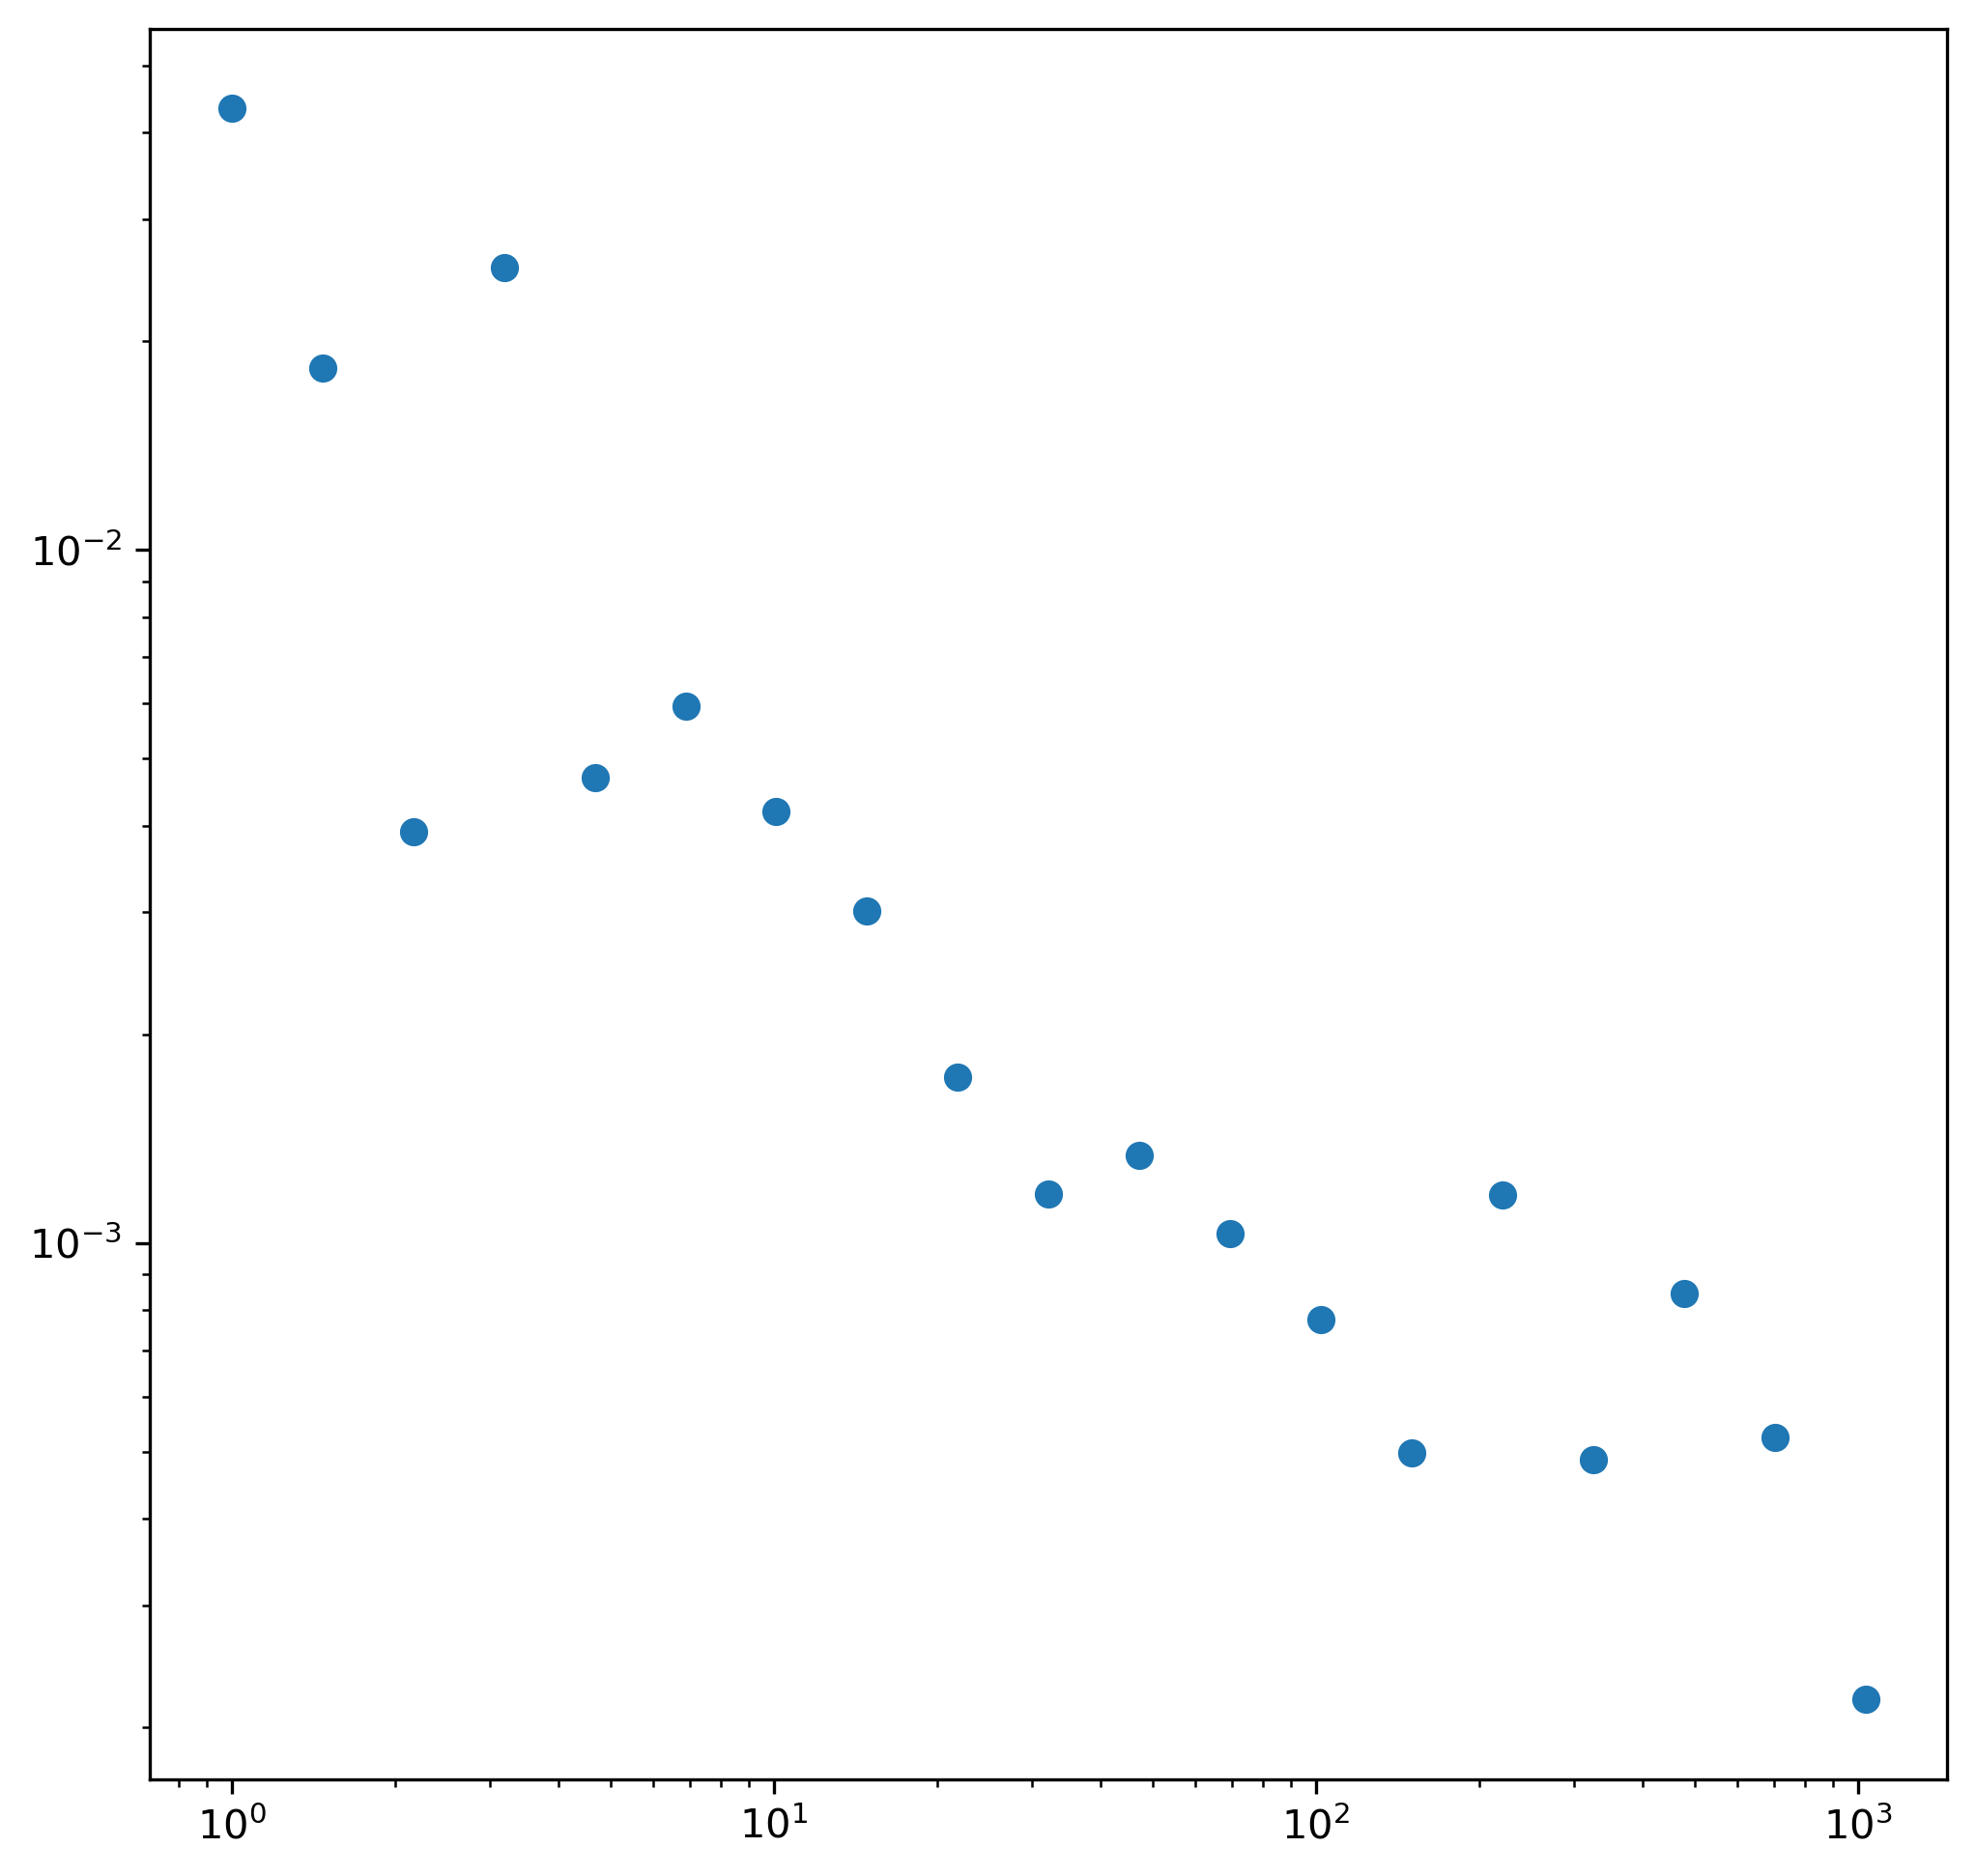

In [26]:
plt.figure(figsize=(8, 8),dpi=300)
plt.loglog(binned_k,pdf,'o')

In [27]:
print('Min and max degree: ', min(degree_list), max(degree_list))

Min and max degree:  1 2234


In [28]:
# degree_bins: 1-99, 100-999, 999-2234

In [30]:
bin_1_nodes = []
bin_2_nodes = []
bin_3_nodes = []

for key in tqdm(G_degree.keys()):
    if G_degree[key] < 100:
        bin_1_nodes.append(key)
    elif G_degree[key] >= 100 and G_degree[key] < 1000:
        bin_2_nodes.append(key)
    else:
        bin_3_nodes.append(key)

100%|██████████████████████████████████████████████████████████████████████████| 4267/4267 [00:00<00:00, 711331.29it/s]


In [31]:
print('Number of nodes in three bins: ', len(bin_1_nodes), len(bin_2_nodes), len(bin_3_nodes))

Number of nodes in three bins:  1022 2669 576


In [33]:
bin_dict = dict()

bin_dict['bin_1'] = bin_1_nodes
bin_dict['bin_2'] = bin_2_nodes
bin_dict['bin_3'] = bin_3_nodes

In [35]:
with open('degree_bins_ddi.pkl', 'wb') as f:
    pickle.dump(bin_dict, f)